In [276]:
#Importar as libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [277]:
# ler os dados 
base_dados = pd.read_csv('unicorns till sep 2022.csv')

# verificar dimensão
base_dados.shape

(1186, 7)

In [278]:
#Primeiros registros
base_dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [279]:
print(base_dados.to_string())

                               Company Valuation ($B) Date Joined               Country                                City                                                             Industry                                                                                       Investors
0                            ByteDance           $140    4/7/2017                 China                              Beijing                                             Artificial intelligence                         Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group
1                               SpaceX           $127   12/1/2012         United States                            Hawthorne                                                               Other                                     Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures
2                                SHEIN           $100    7/3/2018                 China                             Shenzhen         

In [280]:
#renomear colunas
base_dados.rename( columns={
'Company'        :'Empresa',
'Valuation ($B)' :'Valor ($)',
'Date Joined'    :'Data Adesão', 
'Country'        :'Pais', 
'City'           :'Cidade',
'Industry'       :'Setor',
'Investors'      :'Investidores',
},inplace=True)


In [281]:
#Ver tipo dos dados

base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Empresa       1186 non-null   object
 1   Valor ($)     1186 non-null   object
 2   Data Adesão   1186 non-null   object
 3   Pais          1186 non-null   object
 4   City          1186 non-null   object
 5   Setor         1186 non-null   object
 6   Investidores  1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [282]:
# Ver dados nulos
base_dados.isnull().sum()

Empresa          0
Valor ($)        0
Data Adesão      0
Pais             0
City             0
Setor            0
Investidores    18
dtype: int64

In [283]:
base_dados = base_dados.dropna()

In [284]:
#Campos unicos
base_dados.nunique()

Empresa         1165
Valor ($)        221
Data Adesão      692
Pais              46
City             280
Setor             17
Investidores    1152
dtype: int64

In [285]:
#Campos unicos
base_dados['Pais'].unique()

array(['China', 'United States', 'Australia', 'United Kingdom', 'India',
       'Indonesia', 'Germany', 'Turkey', 'Hong Kong', 'Seychelles',
       'Sweden', 'Mexico', 'Estonia', 'Canada', 'Netherlands', 'France',
       'Israel', 'Finland', 'Colombia', 'Belgium', 'Brazil',
       'South Korea', 'Denmark', 'Switzerland', 'Lithuania', 'Austria',
       'Ireland', 'Vietnam', 'United Arab Emirates', 'Argentina', 'Spain',
       'Japan', 'Luxembourg', 'Nigeria', 'Philippines', 'Croatia',
       'Senegal', 'Malaysia', 'Bermuda', 'Norway', 'South Africa',
       'Ecuador', 'Chile', 'Thailand', 'Czech Republic', 'Italy'],
      dtype=object)

In [286]:
#Campos unicos com ranking
base_dados['Setor'].value_counts(normalize=True)

Fintech                                0.204623
Internet software & services           0.191781
E-commerce & direct-to-consumer        0.088185
Health                                 0.080479
Artificial intelligence                0.063356
Supply chain, logistics, & delivery    0.055651
Other                                  0.055651
Cybersecurity                          0.049658
Data management & analytics            0.038527
Auto & transportation                  0.034247
Hardware                               0.032534
Mobile & telecommunications            0.030822
Edtech                                 0.027397
Consumer & retail                      0.023973
Travel                                 0.011986
Artificial Intelligence                0.009418
Internet                               0.001712
Name: Setor, dtype: float64

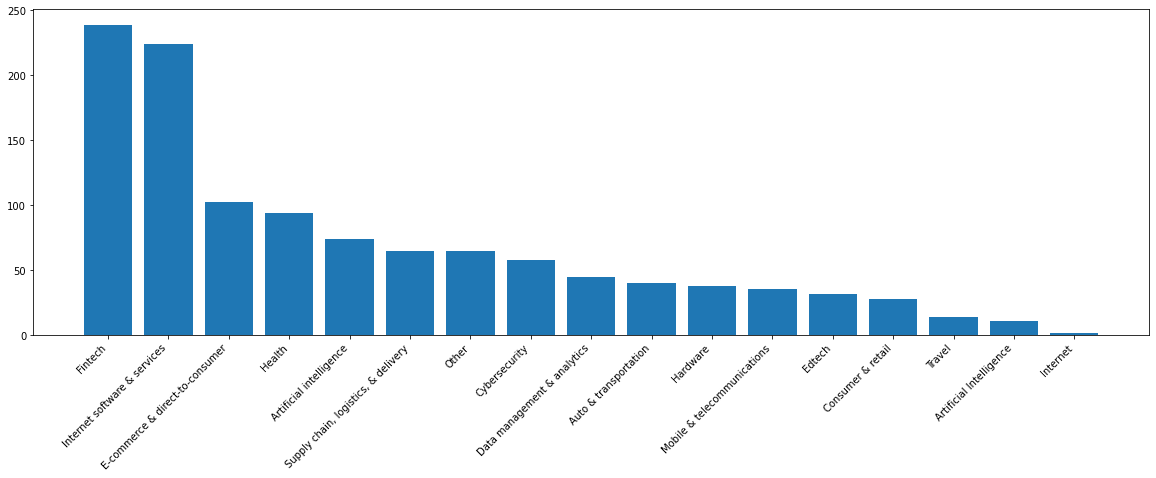

In [287]:
#valores unicos grafico de barras
plt.figure(figsize=(20,6))
plt.bar(base_dados['Setor'].value_counts().index, base_dados['Setor'].value_counts())
plt.xticks( rotation=45, ha='right');

In [288]:
#paises com mais startups
analise = round(base_dados['Pais'].value_counts(normalize=True)*100,1)

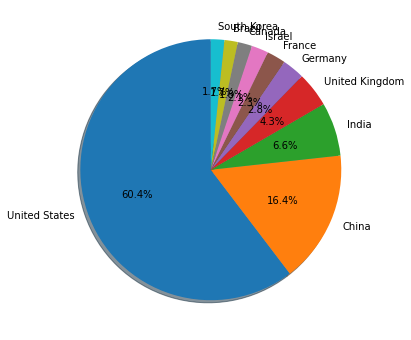

In [289]:
plt.figure(figsize=(20,6))
plt.pie(
    analise.head(10),
    labels= analise.index[0:10],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [290]:
#Transformando object em datetime
base_dados['Data Adesão'] = pd.to_datetime(base_dados['Data Adesão'])

In [291]:
# extrair ano e mes
base_dados['Mês'] = pd.DatetimeIndex(base_dados['Data Adesão']).month
base_dados['Ano'] = pd.DatetimeIndex(base_dados['Data Adesão']).year

base_dados.head()

,Empresa,Valor ($),Data Adesão,Pais,City,Setor,Investidores,Mês,Ano
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [292]:
print(base_dados.dtypes)

Empresa                 object
Valor ($)               object
Data Adesão     datetime64[ns]
Pais                    object
City                    object
Setor                   object
Investidores            object
Mês                      int64
Ano                      int64
dtype: object


In [293]:
Analise_Agrupada = base_dados.groupby( by=['Pais','Ano']).count()['Empresa'].reset_index()
Analise_Agrupada

,Pais,Ano,Empresa
0,Argentina,2021,1
1,Australia,2018,1
2,Australia,2019,1
3,Australia,2021,4
4,Australia,2022,2
...,...,...,...
142,United States,2019,44
143,United States,2020,67
144,United States,2021,311
145,United States,2022,135


In [294]:
Analise_Agrupada.loc[Analise_Agrupada['Pais'] == 'Brazil']

,Pais,Ano,Empresa
10,Brazil,2018,2
11,Brazil,2019,4
12,Brazil,2020,3
13,Brazil,2021,6
14,Brazil,2022,2


In [295]:
base_dados['Valor ($)'] = base_dados['Valor ($)'].astype(str)

In [296]:
base_dados['Valor ($)'] = pd.to_numeric(base_dados['Valor ($)'].apply(lambda Linha: Linha.replace('$', ' ')))


In [297]:
base_dados.head

<bound method NDFrame.head of                   Empresa  Valor ($) Data Adesão           Pais  \
0               ByteDance      140.0  2017-04-07          China   
1                  SpaceX      127.0  2012-12-01  United States   
2                   SHEIN      100.0  2018-07-03          China   
3                  Stripe       95.0  2014-01-23  United States   
4                   Canva       40.0  2018-01-08      Australia   
...                   ...        ...         ...            ...   
1181          LeadSquared        1.0  2022-06-21          India   
1182            FourKites        1.0  2022-06-21  United States   
1183          VulcanForms        1.0  2022-07-05  United States   
1184          SingleStore        1.0  2022-07-12  United States   
1185  Unstoppable Domains        1.0  2022-07-27  United States   

              City                                 Setor  \
0           Beijing              Artificial intelligence   
1         Hawthorne                          

In [298]:
Analise_pais =base_dados.groupby( by=['Pais']).sum('Valor ($)').reset_index()

Analise_pais.head(10).sort_values('Valor ($)',ascending=False)

,Pais,Valor ($),Mês,Ano
8,China,677.59,1082,349222
1,Australia,54.40,41,16165
6,Canada,49.23,97,38401
5,Brazil,40.08,135,34342
3,Belgium,8.95,9,6062
2,Austria,7.61,9,4042
9,Colombia,7.40,20,6055
7,Chile,2.50,9,4043
0,Argentina,2.45,8,2021
4,Bermuda,1.60,4,2017


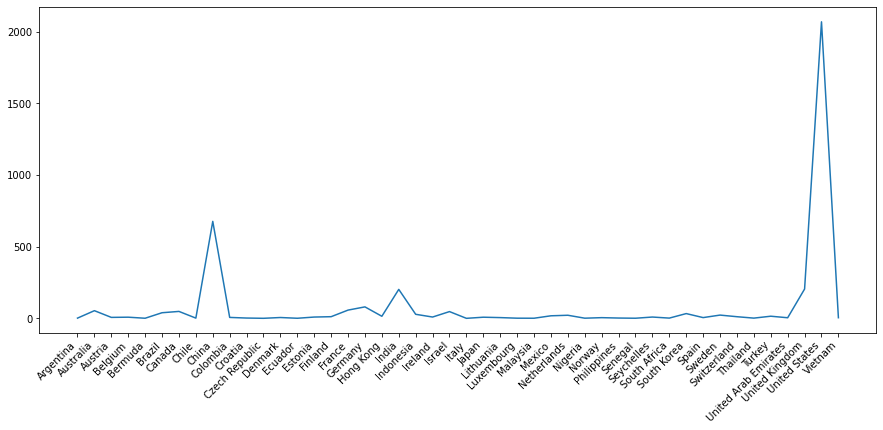

In [301]:
plt.figure(figsize=(15,6))
plt.plot(Analise_pais['Pais'],Analise_pais['Valor ($)'])
plt.xticks(rotation=45, ha= 'right');